# Read Data

In [581]:
import numpy as np

In [582]:
import pandas as pd

df = pd.read_csv('../Dataset/dailyActivity_merged.csv')

In [583]:
df.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [585]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [586]:
def percent_null(series):
    return

def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in df.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(df[col]))+"%",
        'dtype': df[col].dtype,
        'count': df[col].count(),
        'nunique': df[col].nunique(),
        'mode': df[col].mode().values if not df[col].mode().empty else None,
        'unique value': list(df[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)

,Column Name,%null,dtype,count,nunique,mode,unique value
0,Id,0%,int64,940,33,"[1503960366, 1624580081, 1844505072, 192797227...","[1503960366, 4319703577, 8583815059, 837856320..."
1,ActivityDate,0%,object,940,31,"[4/12/2016, 4/13/2016, 4/14/2016, 4/15/2016]","[4/12/2016, 4/14/2016, 4/15/2016, 4/13/2016, 4..."
2,TotalSteps,0%,int64,940,842,[0],"[0, 244, 6708, 9167, 6175, 10538, 1510, 8538, ..."
3,TotalDistance,0%,float64,940,615,[0.0],"[0.0, 2.59999990463257, 0.0099999997764825, 3...."
4,TrackerDistance,0%,float64,940,613,[0.0],"[0.0, 2.59999990463257, 0.0099999997764825, 3...."
5,LoggedActivitiesDistance,0%,float64,940,19,[0.0],"[0.0, 2.0921471118927, 2.25308108329773, 4.081..."
6,VeryActiveDistance,0%,float64,940,333,[0.0],"[0.0, 0.0700000002980232, 0.0599999986588955, ..."
7,ModeratelyActiveDistance,0%,float64,940,211,[0.0],"[0.0, 0.200000002980232, 0.280000001192093, 0...."
8,LightActiveDistance,0%,float64,940,491,[0.0],"[0.0, 4.17999982833862, 3.17000007629395, 4.88..."
9,SedentaryActiveDistance,0%,float64,940,9,[0.0],"[0.0, 0.0099999997764825, 0.0199999995529652, ..."


In [587]:
df = df.drop(columns='Id')

# Data Cleansing

## Handle Missing Values

In [588]:
def percent_null(series):
    total_nulls = (series.isnull() | (series == '')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

print("Jumlah null pada data: "+str(percent_null(df[col]))+"%")

Jumlah null pada data: 0%


Tidak ada penanganan karena tidak ada nilai null.

## Handle duplicated data

In [589]:
print('Duplicate data:', len(df) - len(df.drop_duplicates()))

Duplicate data: 1


Membuang satu kolom duplikat.

In [590]:
df = df.drop_duplicates()

## Handle outliers

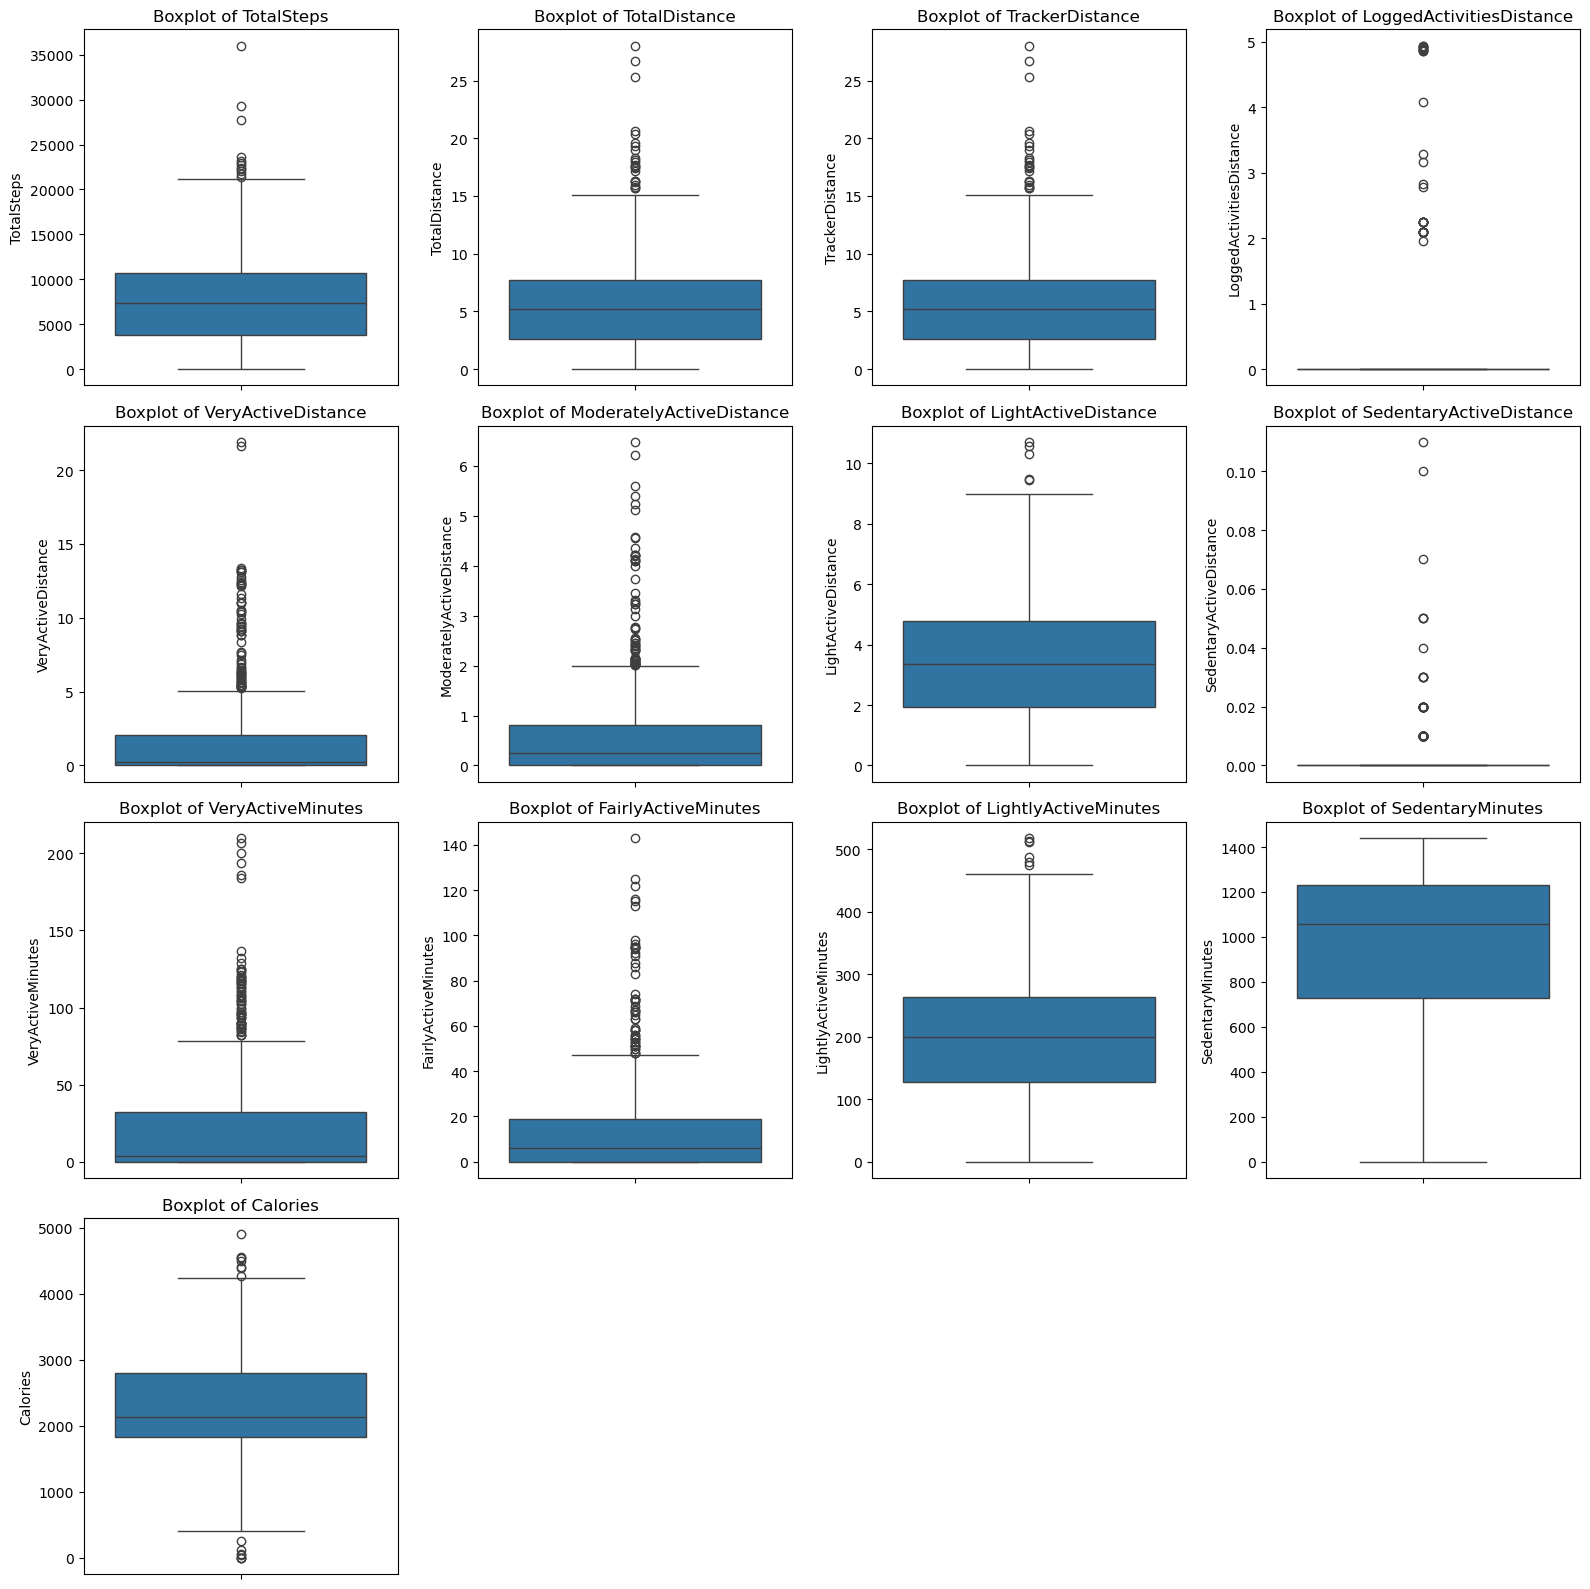

In [592]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

In [593]:
col_with_outliers = [ 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'Calories']

### Hapus dengan z-score

In [594]:
for col in col_with_outliers:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())  # Calculate Z-scores for each column
    dfz = df[z_scores < 3]

In [595]:
dfz = dfz.reset_index()
dfz = dfz.drop(columns='index')
dfz

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
924,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
925,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
926,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [596]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(dfz)))

Jumlah Data yang Hilang: 11


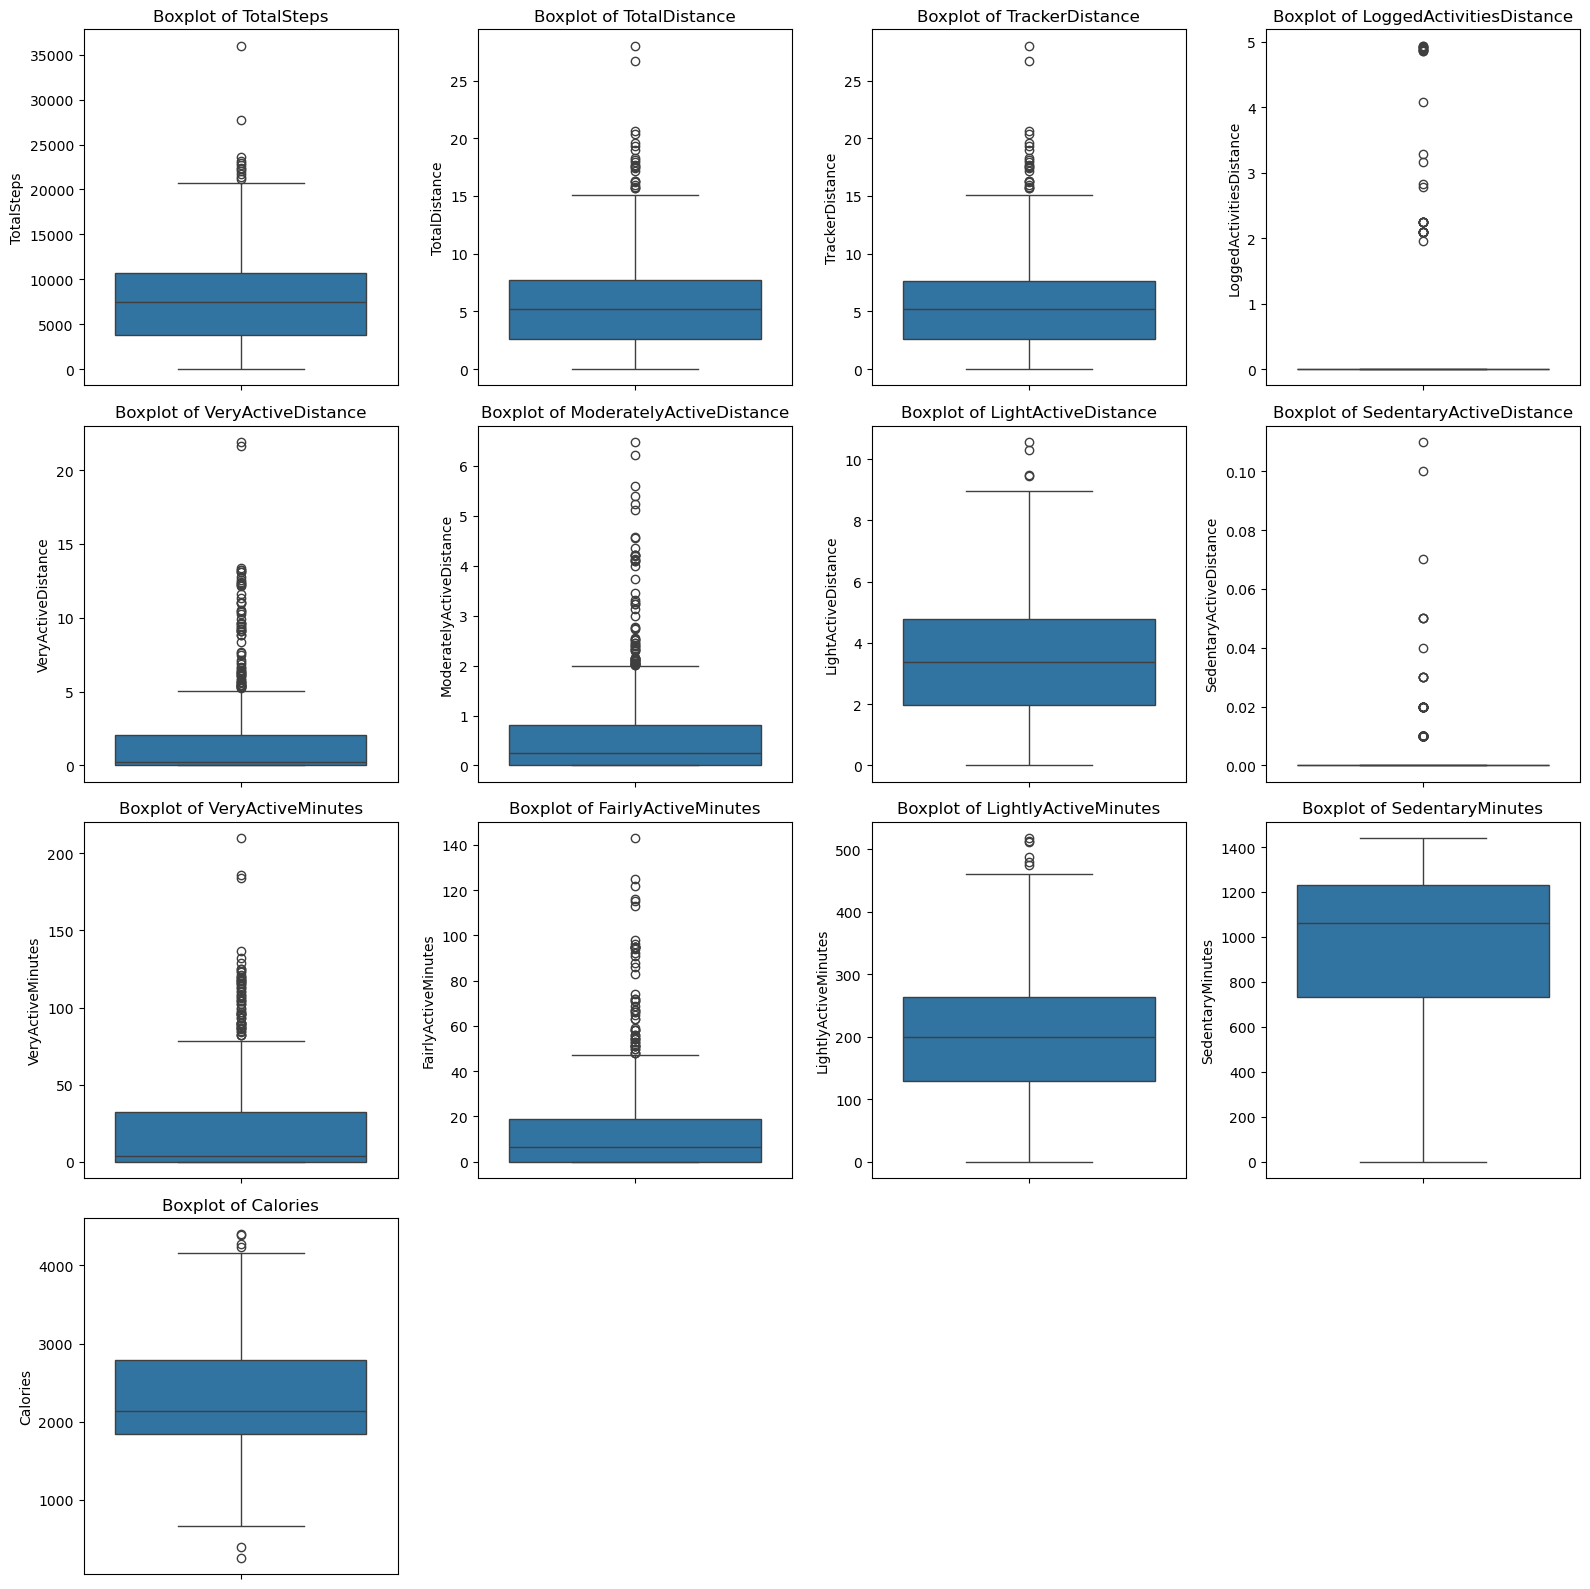

In [597]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(dfz.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=dfz, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

### Hapus dengan IQR

In [598]:
for col in col_with_outliers:
    Q1 = df[col].quantile(0.25)  # Calculate Q1 for the column
    Q3 = df[col].quantile(0.75)  # Calculate Q3 for the column
    IQR = Q3 - Q1  # Calculate IQR for the column
    
    # Apply IQR method to filter out outliers for this specific column
    df_iqr = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

In [599]:
df_iqr = df_iqr.reset_index()
df_iqr = df_iqr.drop(columns='index')
df_iqr

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
920,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
921,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
922,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [600]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(df_iqr)))

Jumlah Data yang Hilang: 15


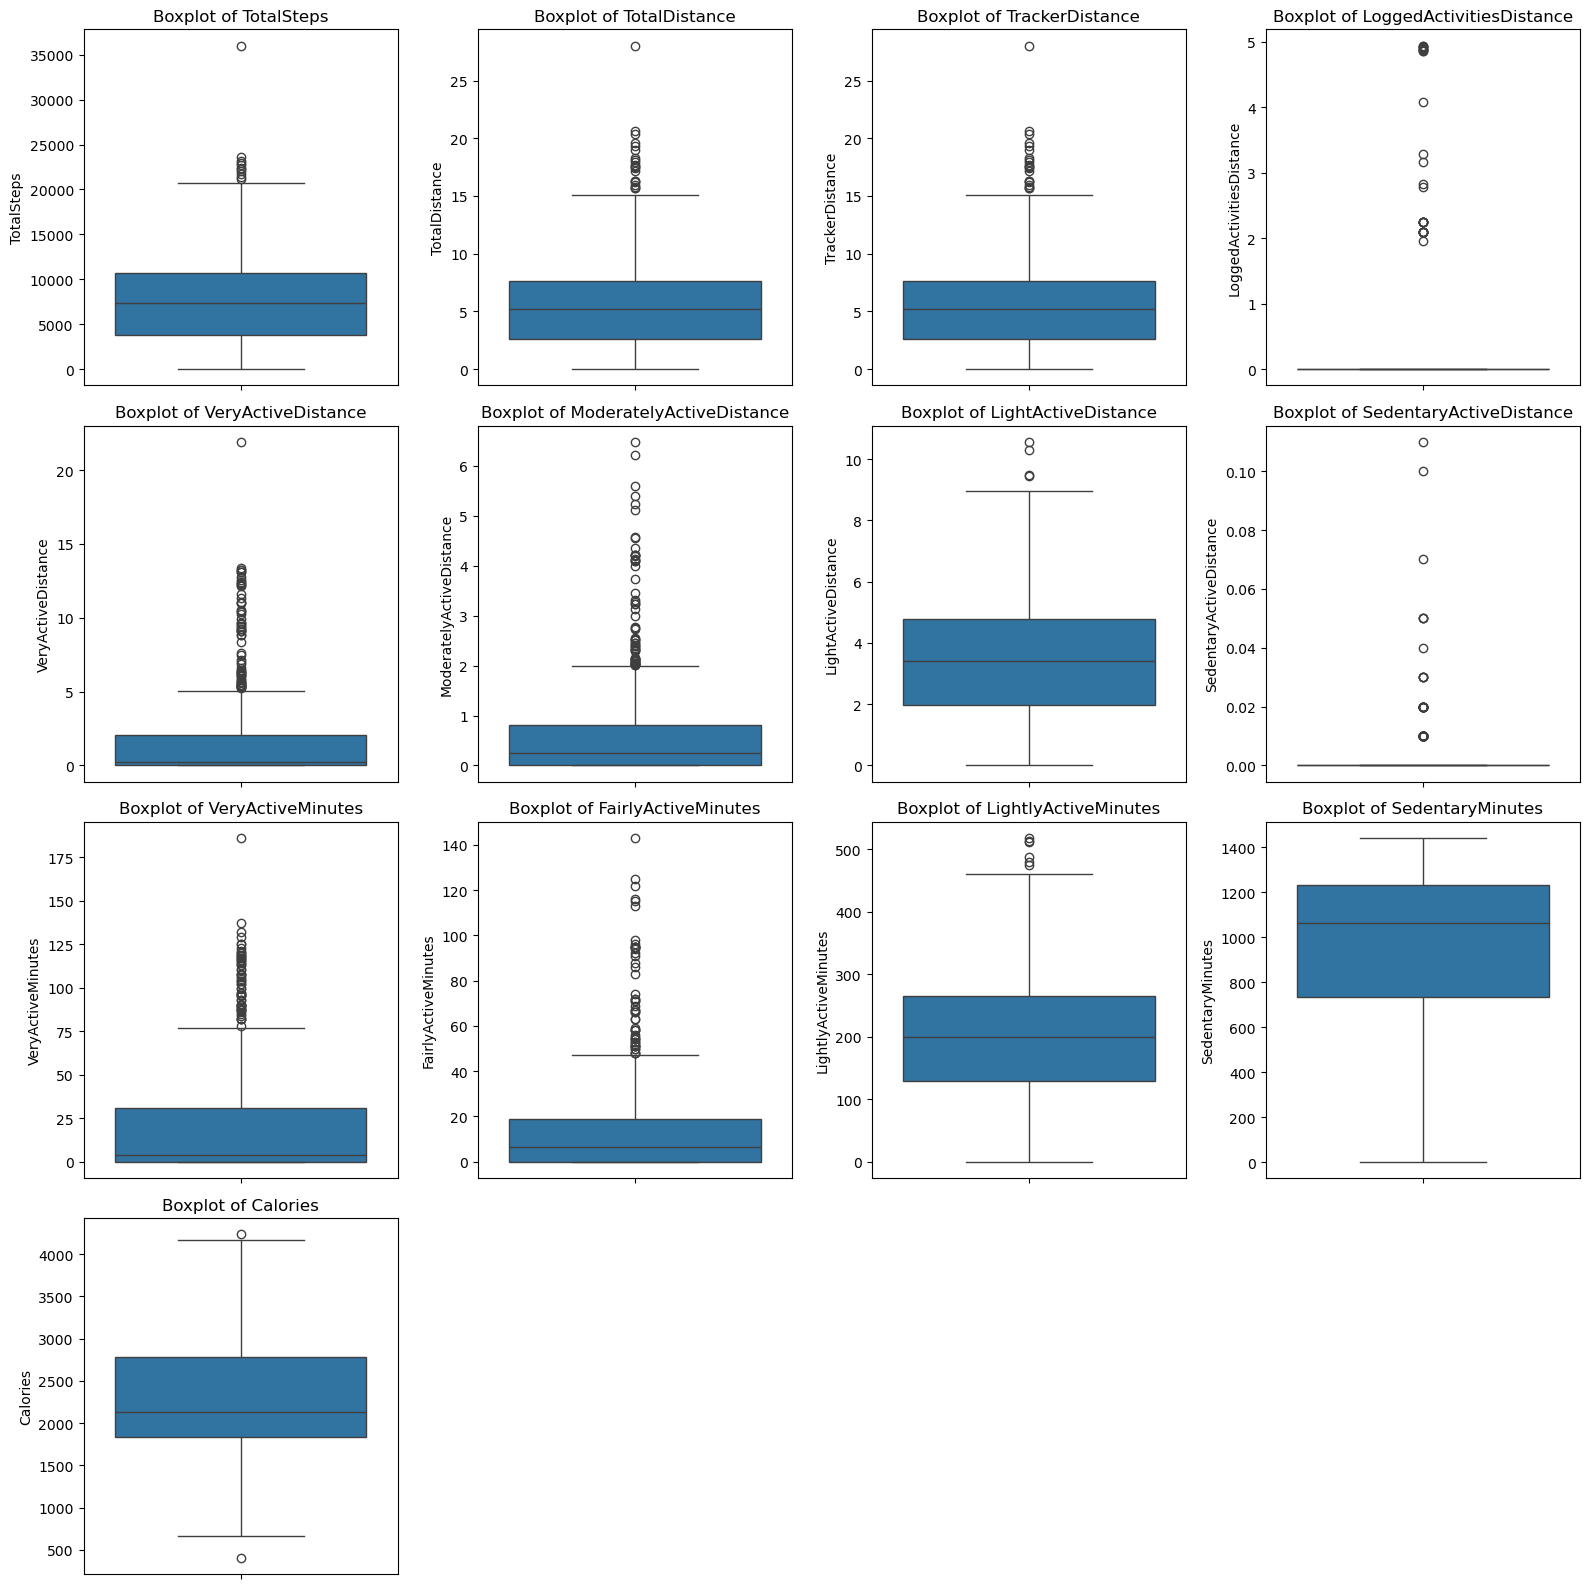

In [601]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df_iqr.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df_iqr, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

### Tanpa hapus outlier, transform data pakai log_transform

In [602]:
dft = df.copy()
dft[col_with_outliers] = df[col_with_outliers].apply(lambda x: np.log(x + 1))

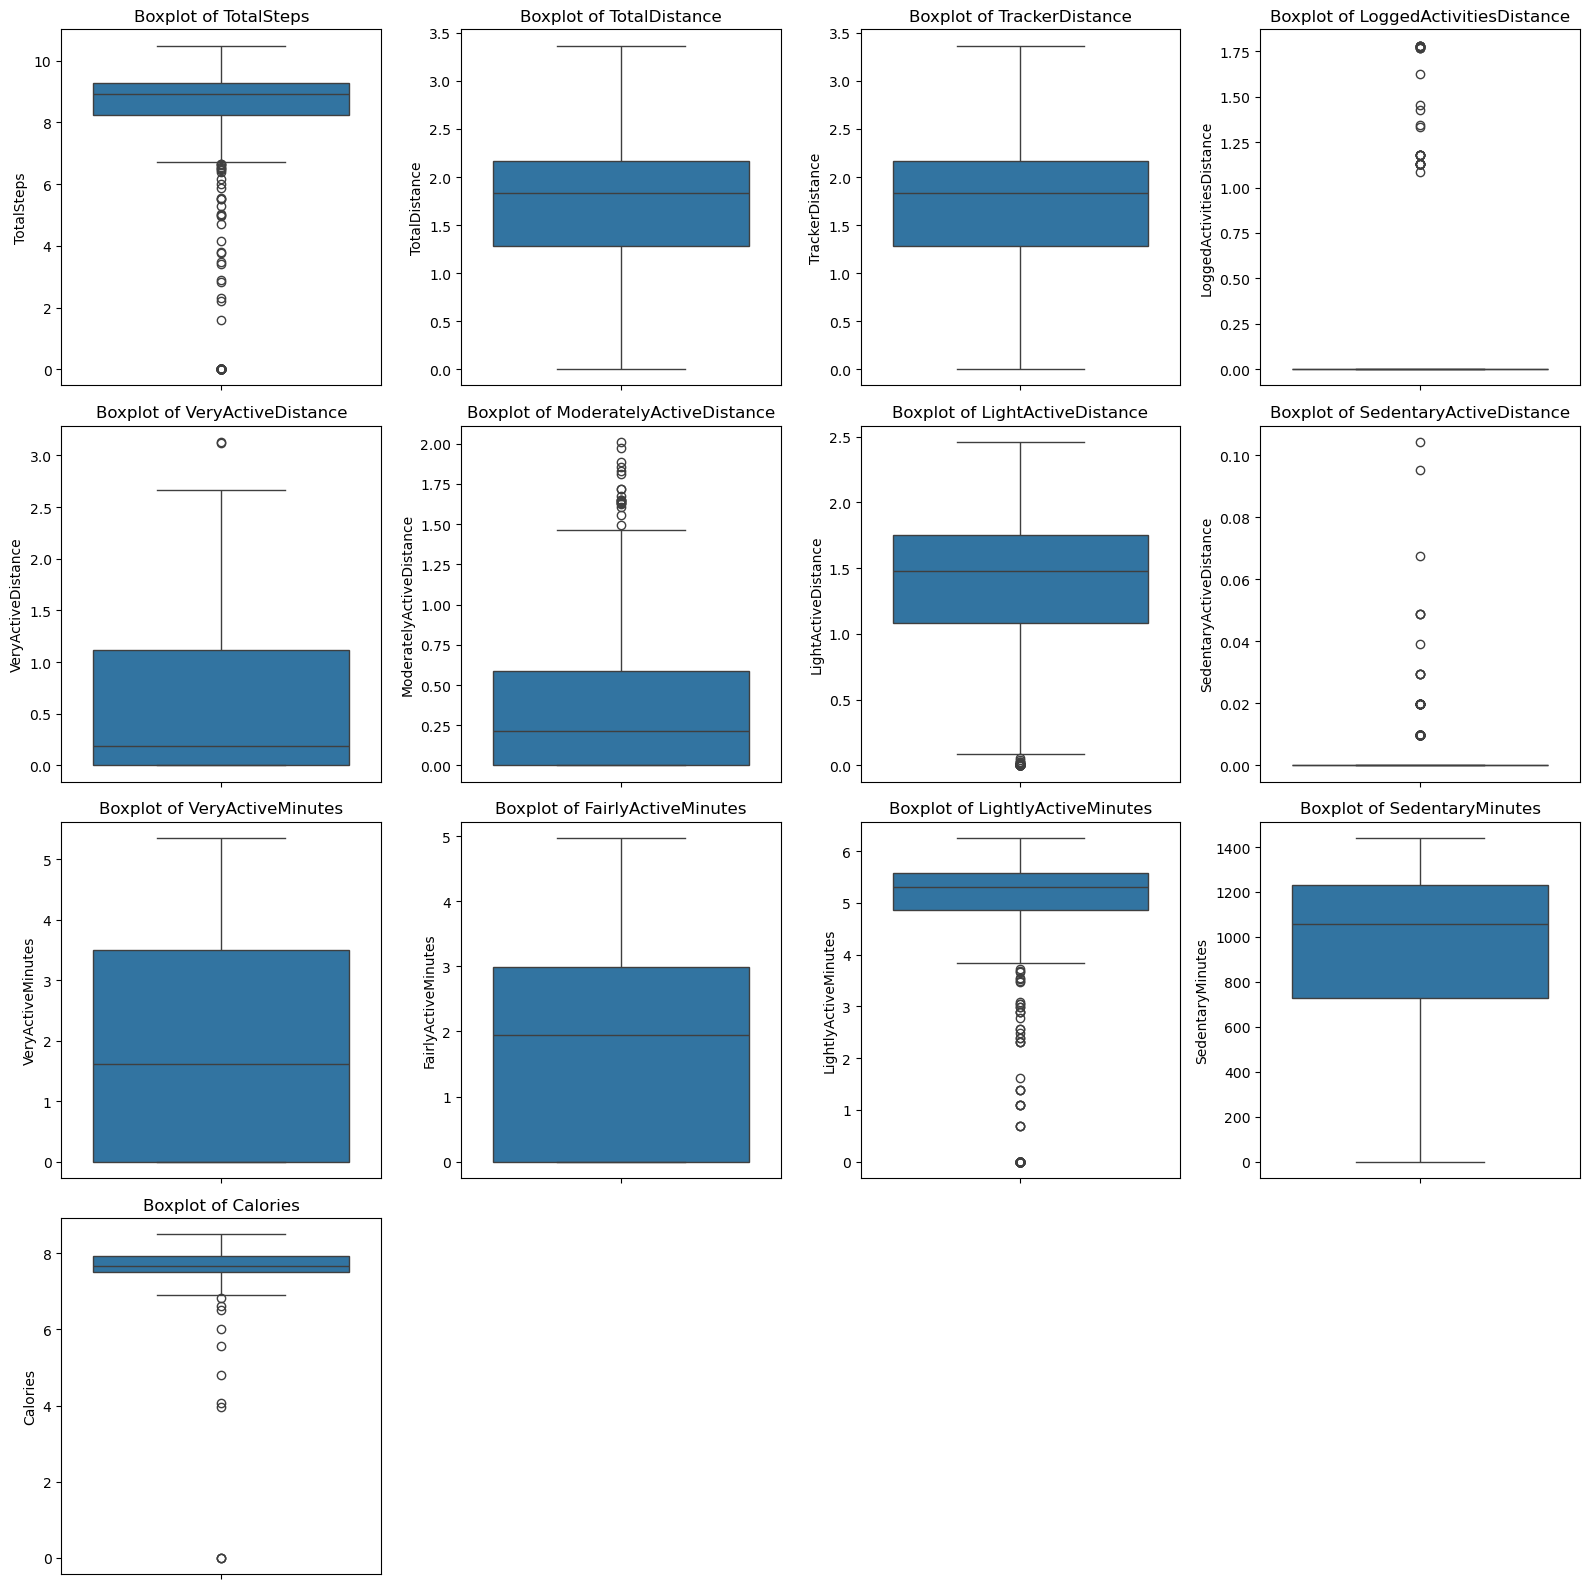

In [603]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(dft.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=dft, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

In [604]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(dft)))

Jumlah Data yang Hilang: 0


### Hapus dengan Clustering DBScan

In [605]:
from sklearn.cluster import DBSCAN

def dbscan_outlier_removal(df, col, eps=0.5, min_samples=5):
    # Reshape the column data for DBSCAN (DBSCAN expects a 2D array)
    column_data = df[col].values.reshape(-1, 1)
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(column_data)
    
    # DBSCAN assigns -1 to noise (outliers)
    df_cleaned = df[labels != -1]  # Keep only rows that are not outliers
    return df_cleaned

# Copy the original DataFrame to df_db (to retain non-outlier columns)
df_db = df.copy()

# Apply DBSCAN to only the columns listed in col_with_outliers
# col_with_outliers_nobest = ['TotalSteps','ModeratelyActiveDistance','LightlyActiveMinutes','LoggedActivitiesDistance','SedentaryActiveDistance']

df_db = dbscan_outlier_removal(df_db, 'TotalSteps', eps=200, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'TotalDistance', eps=0.1, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'TrackerDistance', eps=0.1, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'LoggedActivitiesDistance', eps=0.001, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'VeryActiveDistance', eps=0.04, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'ModeratelyActiveDistance', eps=0.02, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'LightlyActiveMinutes', eps=2, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'SedentaryActiveDistance', eps=0.0001, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'VeryActiveMinutes', eps=3, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'FairlyActiveMinutes', eps=2, min_samples=5) #kalau kebanyakan data yg kebuang jadi 1
df_db = dbscan_outlier_removal(df_db, 'LightActiveDistance', eps=0.04, min_samples=5)
df_db = dbscan_outlier_removal(df_db, 'Calories', eps=15, min_samples=5)

#### Untuk mengecek nearest neighbor (untuk dapat epsilon)

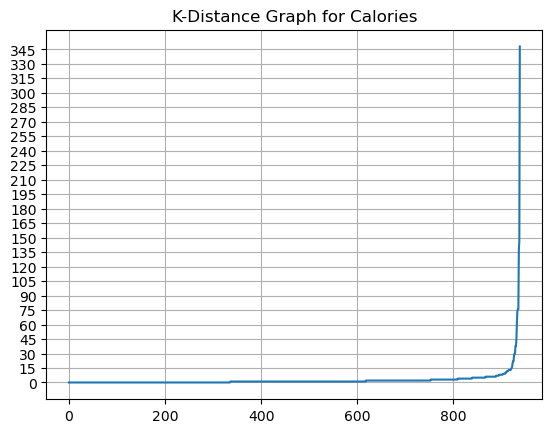

In [606]:
from sklearn.neighbors import NearestNeighbors
# Example for TotalSteps column
col = 'Calories'
column_data = df[[col]].values  # Reshape to 2D array

# Use NearestNeighbors to calculate k-distance
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(column_data)
distances, indices = neighbors_fit.kneighbors(column_data)

# Sort distances and plot the k-distance graph
distances = np.sort(distances[:, 1], axis=0)
plt.yticks(np.arange(0, max(distances) + 1, step=15))
plt.plot(distances)
plt.title(f'K-Distance Graph for {col}')
plt.grid(visible=True)
plt.show()

In [607]:
df_db = df_db.reset_index()
df_db = df_db.drop(columns='index')
df_db.tail()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
565,5/9/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
566,4/18/2016,11423,8.67,8.67,0.0,2.44,0.27,5.94,0.0,29,5,191,1215,2761
567,5/1/2016,10930,8.32,8.32,0.0,3.13,0.57,4.57,0.0,36,12,166,1226,2786
568,5/2/2016,4790,3.64,3.64,0.0,0.00,0.00,3.56,0.0,0,0,105,1335,2189
569,5/12/2016,8064,6.12,6.12,0.0,1.82,0.04,4.25,0.0,23,1,137,770,1849


In [608]:
print("Jumlah Data yang Hilang: "+str(len(df)-len(df_db)))

Jumlah Data yang Hilang: 369


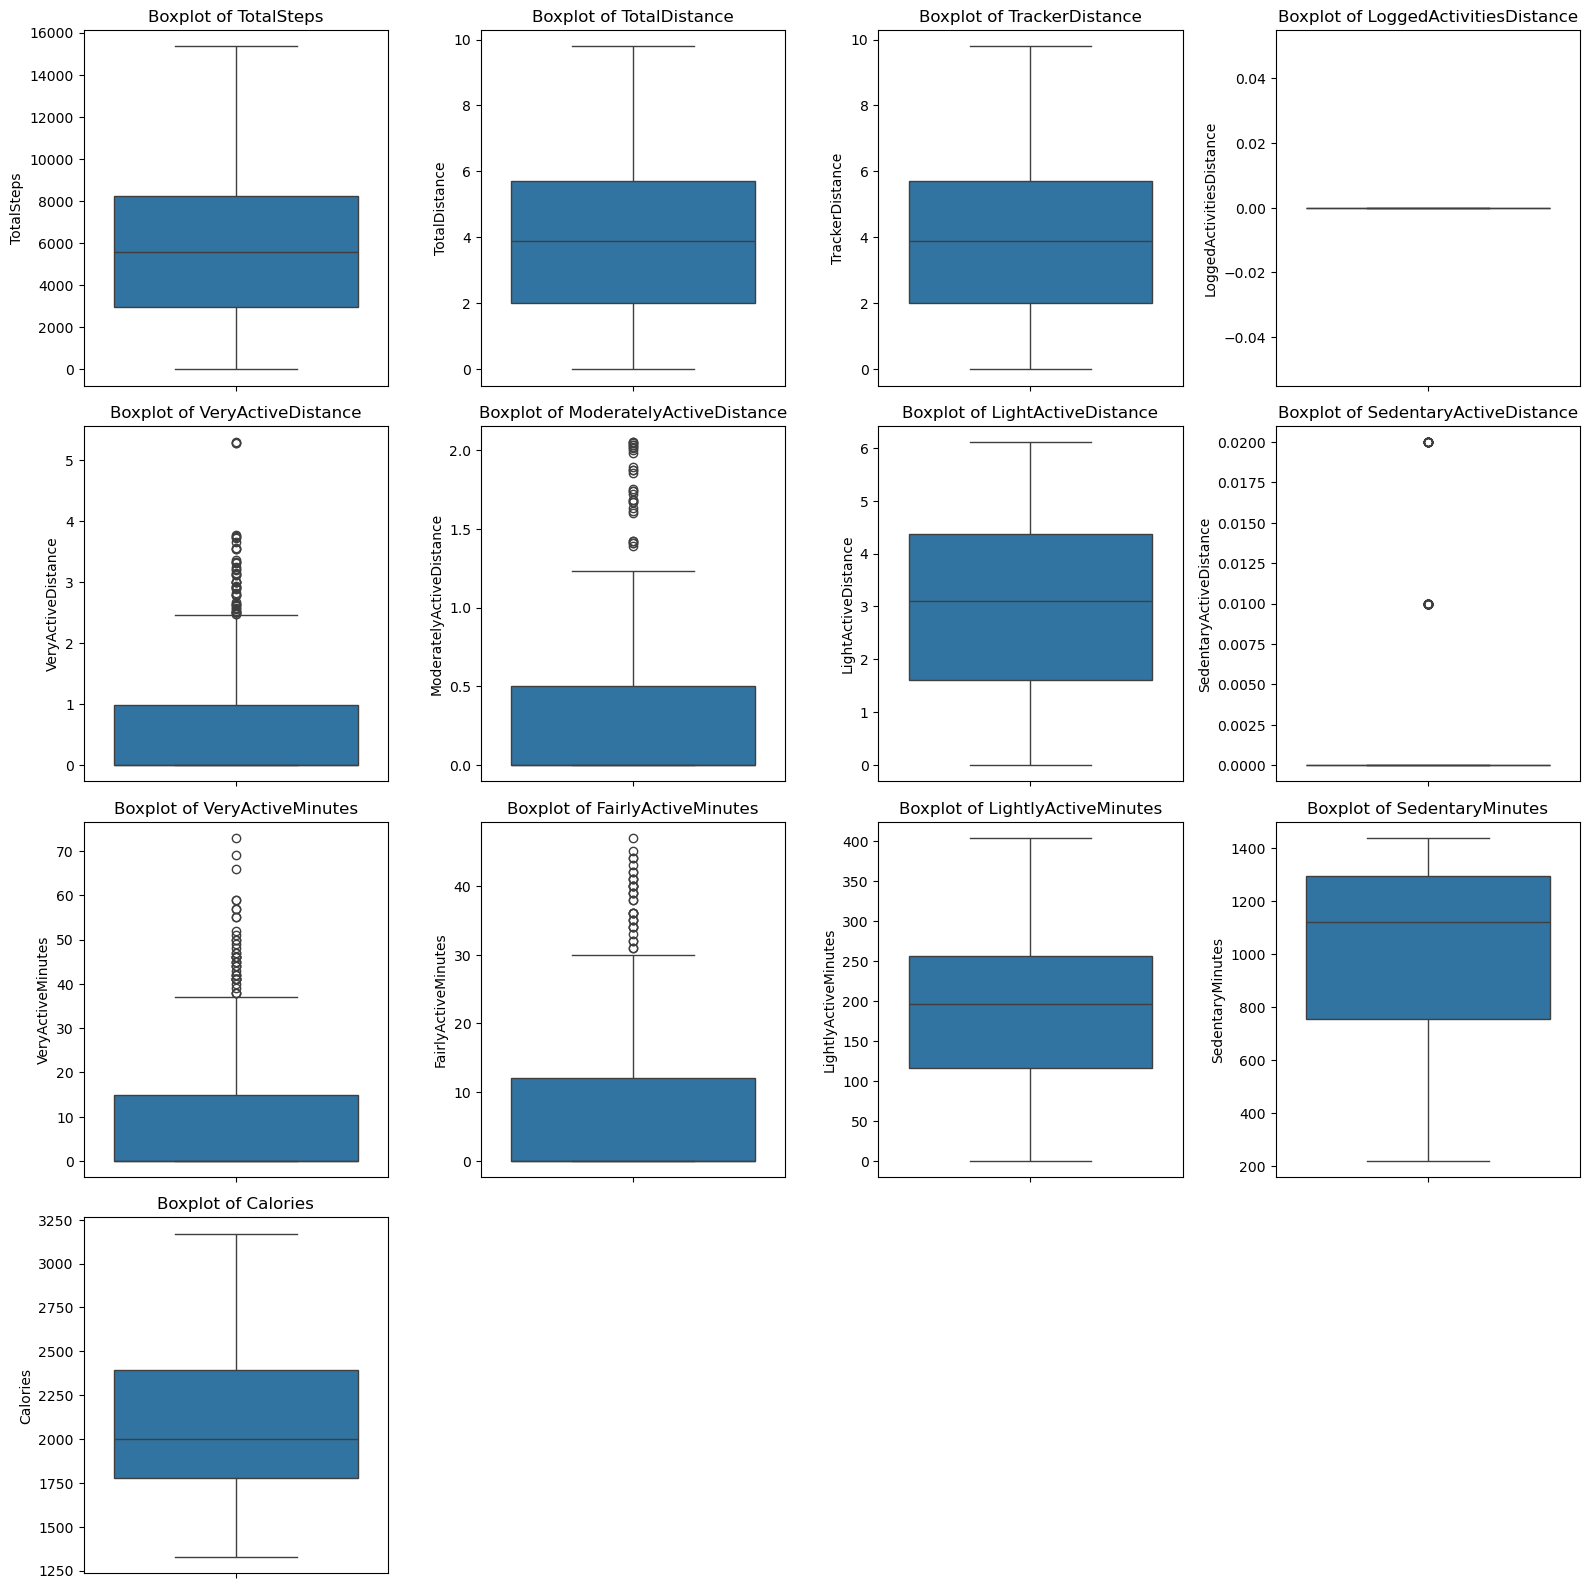

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df_db.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df_db, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

Sementara menggunakan hasil dari zscore (dfz). Metode lain akan dicoba jika nanti hasil machine learning kurang bagus.

#  Feature Engineering

## Feature extraction
Ambil nama hari, tanggal, bulan, tahun, dan isweekend. Ambil juga distance per step.

In [610]:
dfz['ActivityDate'] = dfz['ActivityDate'].apply(pd.to_datetime)

In [611]:
dfz['DayOfWeek'] = dfz['ActivityDate'].dt.day_of_week # Monday=0, Sunday=6
dfz['DayOfWeek'] = dfz['ActivityDate'].dt.day
dfz['Month'] = dfz['ActivityDate'].dt.month
dfz['Year'] = dfz['ActivityDate'].dt.year
dfz['is_weekend'] = dfz['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0) 


In [612]:
dfz['DistancePerStep'] = dfz.apply(lambda row: 0 if row['TotalSteps'] == 0 else row['TotalDistance'] / row['TotalSteps'], axis=1)

In [613]:
dfz = dfz.drop(columns='ActivityDate')

In [614]:
dfz.tail()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Month,Year,is_weekend,DistancePerStep
923,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,8,5,2016,0,0.000759
924,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,9,5,2016,0,0.000902
925,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,10,5,2016,0,0.000759
926,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,11,5,2016,0,0.000913
927,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849,12,5,2016,0,0.000759


## Fitur Tambahan yang belum ada di dataset

- Data jumlah kalori yang dikeluarkan per hari agar seseorang bisa hidup sehat.
- Goals dari tiap user (apakah olahraga untuk sehat/menurunkan berat badan/alasan lain).
- Data total steps per hari agar seseorang bisa hidup sehat.

## Feature transformation

## Feature encoding
Semua fitur sudah sekalian di encode saat feature extraction.

## Feature selection

In [617]:
X = dfz.drop(columns=['Calories'],inplace=False)
y = dfz['Calories']

In [620]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

selected_columns = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

selected_features = pd.DataFrame({'Feature': selected_columns,
                                  'Mutual Information Score': scores
                    }).sort_values(by='Mutual Information Score', ascending=False).reset_index().drop(columns='index')

selected_features

,Feature,Mutual Information Score
0,TotalDistance,0.680307
1,DistancePerStep,0.669602
2,TrackerDistance,0.664761
3,TotalSteps,0.634478
4,SedentaryMinutes,0.458401
5,LightlyActiveMinutes,0.392953
6,VeryActiveMinutes,0.370072
7,LightActiveDistance,0.361583
8,VeryActiveDistance,0.224690
9,FairlyActiveMinutes,0.159705


Ambil fitur yang scorenya diatas 0.1

In [621]:
selected_features = selected_features['Feature'].head(10).tolist()
selected_features.append('Calories')
selected_features

['TotalDistance',
 'DistancePerStep',
 'TrackerDistance',
 'TotalSteps',
 'SedentaryMinutes',
 'LightlyActiveMinutes',
 'VeryActiveMinutes',
 'LightActiveDistance',
 'VeryActiveDistance',
 'FairlyActiveMinutes',
 'Calories']

In [623]:
dfz = dfz[selected_features]

dfz.tail()

,TotalDistance,DistancePerStep,TrackerDistance,TotalSteps,SedentaryMinutes,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,VeryActiveDistance,FairlyActiveMinutes,Calories
923,8.110000,0.000759,8.110000,10686,1174,245,17,6.80,1.08,4,2847
924,18.250000,0.000902,18.250000,20226,1131,217,73,6.24,11.10,19,3710
925,8.150000,0.000759,8.150000,10733,1187,224,18,6.28,1.35,11,2832
926,19.559999,0.000913,19.559999,21420,1127,213,88,5.89,13.22,12,3832
927,6.120000,0.000759,6.120000,8064,770,137,23,4.25,1.82,1,1849


In [624]:
len(df)

939

## Handle class imbalance

Tidak ada handling class imbalance karena ini kasus regression.